# Well to seismic tie

In [1]:
import numpy as np
import pandas as pd
import lasio
import seaborn as sns
import matplotlib.pyplot as plt

**Well data loading**

In [2]:
las5_1=lasio.read(r"C:\Users\RAJKUMAR MONDAL\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\Underground Coal Gasification\Well_data south aus\PLAYFORD 5\playford_5_composite_filt_10cm.las")
las5_2=lasio.read(r"C:\Users\RAJKUMAR MONDAL\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\Underground Coal Gasification\Well_data south aus\PLAYFORD 5\playford_5_composite_filt_10cm_tail.las")

df5_1=las5_1.df().reset_index()
df5_2=las5_2.df().reset_index()

df5_1=df5_1.dropna()
df5_2=df5_2.dropna()


**Merged two las file of one well**

In [3]:
df5_2_filtered = df5_2[df5_2['DEPT'] > 467.6]

# Merge the two DataFrames
df5 = pd.concat([df5_1, df5_2_filtered], ignore_index=True)

# Sort by depth to ensure a smooth curve
df5 = df5.sort_values(by='DEPT').reset_index(drop=True)
df5.columns

Index(['DEPT', 'TENS', 'SPED', 'EAST', 'NORTH', 'TVD', 'CA', 'CD', 'DLS',
       'GRDE', 'CADE', 'TEMP', 'DENL', 'DENB', 'BRDU', 'LSDU', 'SSDU', 'DTPF',
       'VELK', 'LSNU', 'SSNU', 'NPHI', 'AZID', 'TMAG', 'TILD', 'FE1', 'FE2'],
      dtype='object')

**Vp and Vs calculation**

In [5]:
df5["Vp"] = (1 / df5["DTPF"]) * 304800

df5["Vs"] = 0.8042 * df5["Vp"] - 855.8


Vp = df5["Vp"]
Vs = df5["Vs"]


poissons_ratio = (0.5*(Vp/Vs)**2-1) / ((Vp/Vs)**2-1)

df5["PR"] = poissons_ratio
 

df5["Edyn"] = (df5["DENB"] * (1.76 + df5["PR"]) * df5["Vs"] ** 2)/10**6        ## for calibration 1 replaced by 1.76 

df5["Esta"] = 0.462 * df5["Edyn"]                                          ## for calibration 0.352 replaced by 0.462


**Real seismic section load**

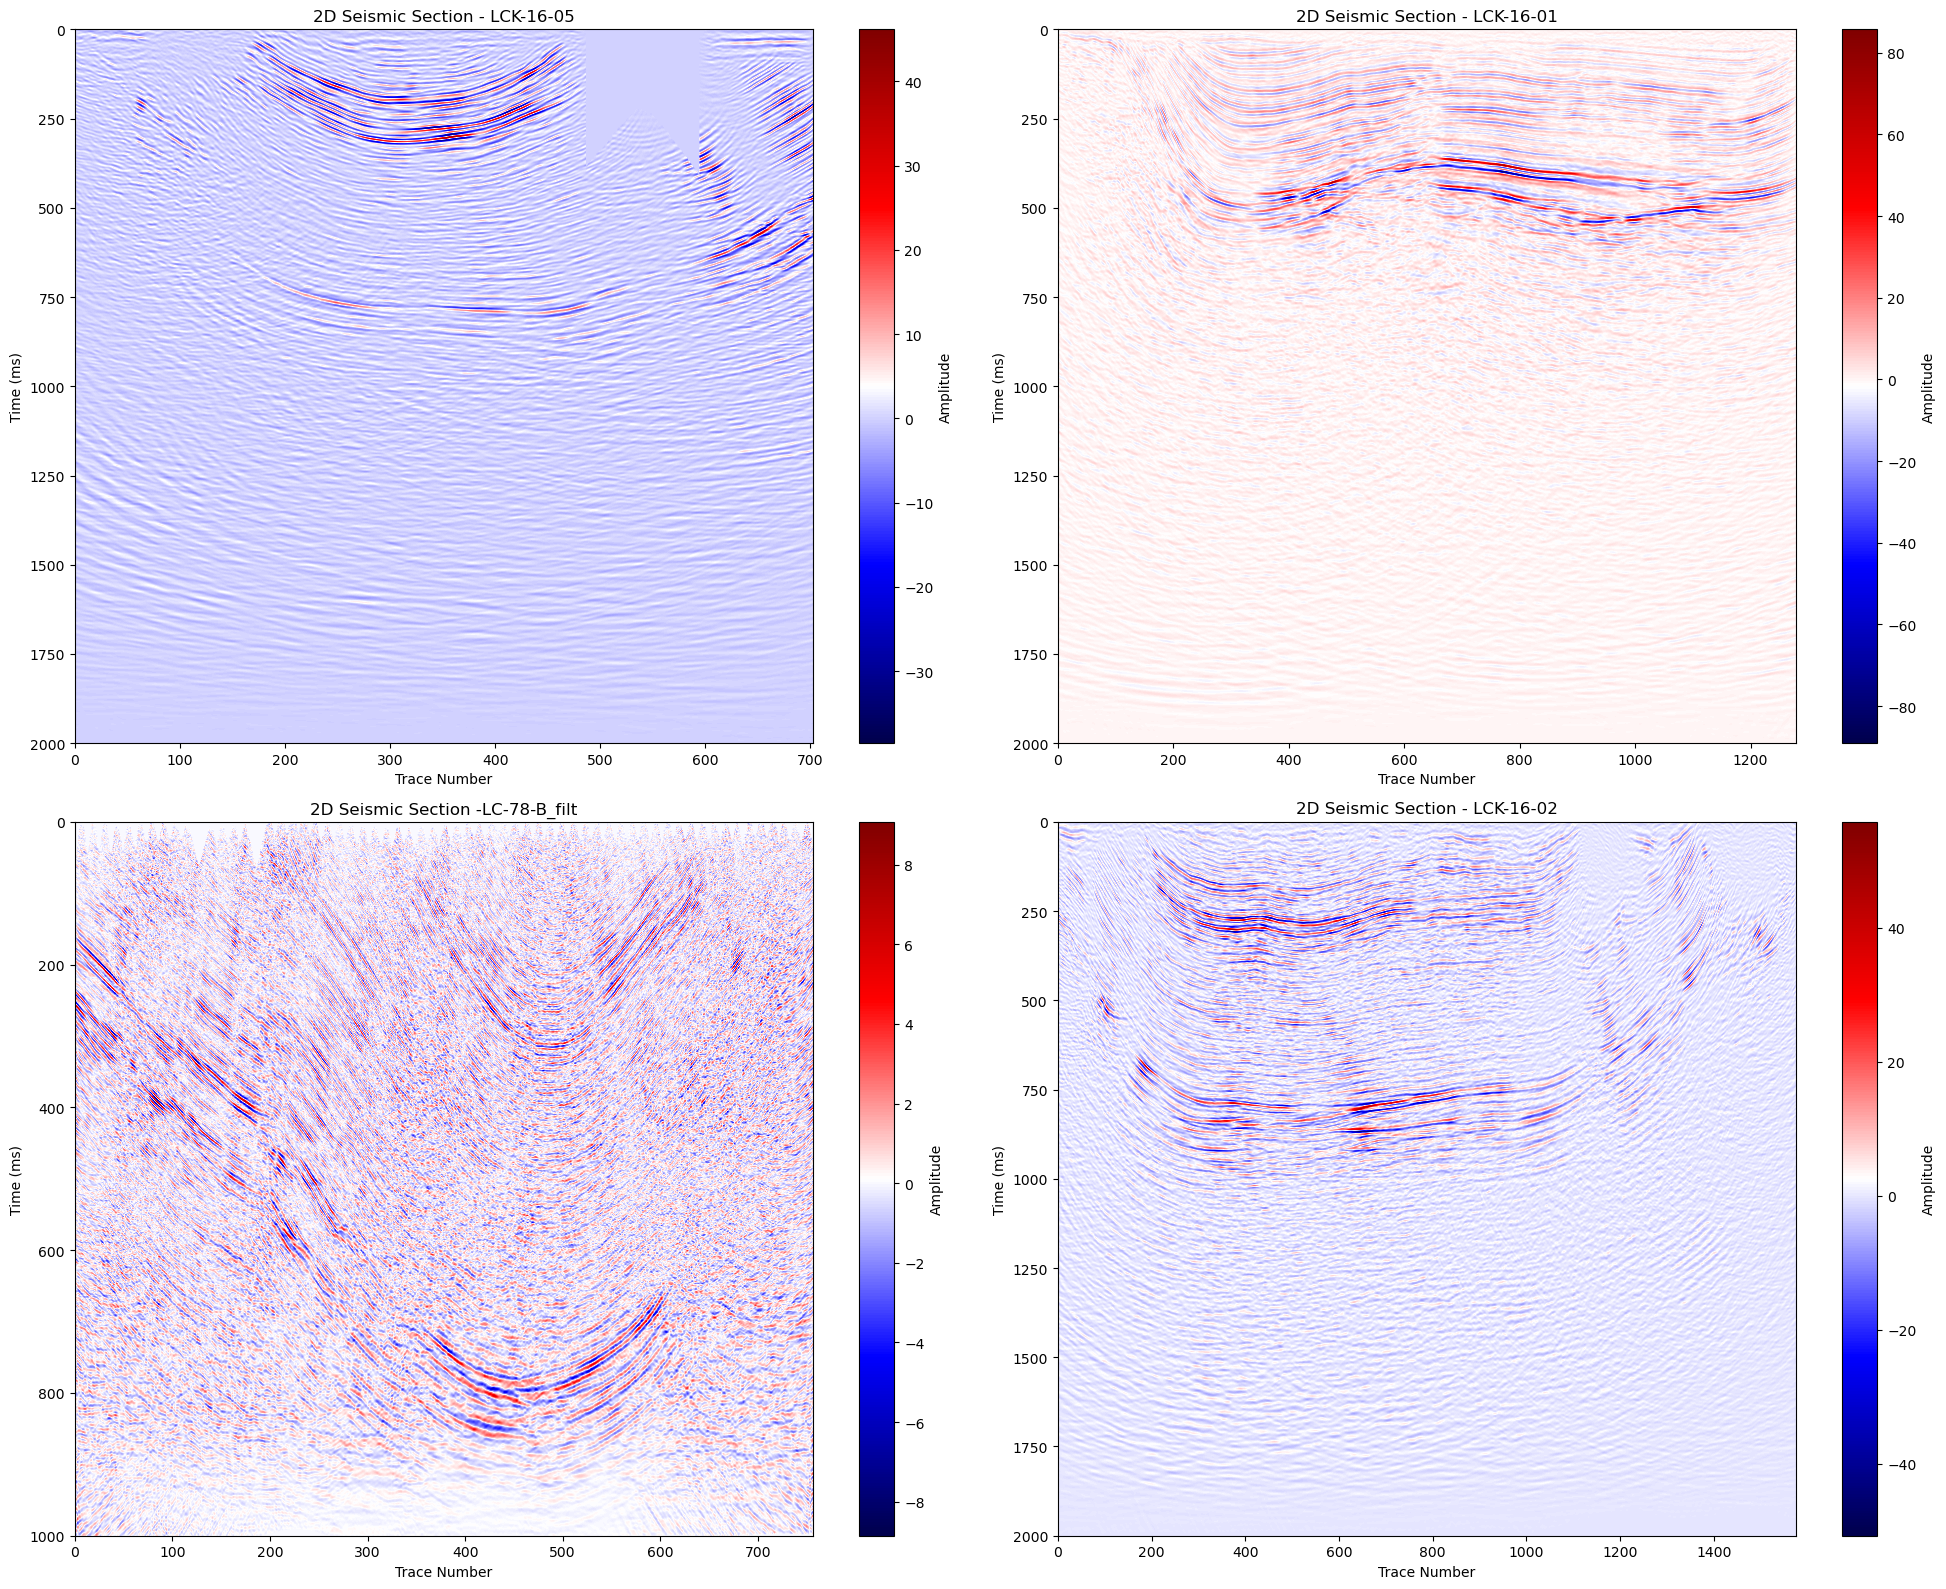

In [25]:
import segyio
import numpy as np
import matplotlib.pyplot as plt

# Paths to your SEG-Y files
file_path1 = r"C:\Users\RAJKUMAR MONDAL\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\Underground Coal Gasification\seismic data south aus\Leigh_Creek_2016_2018\LCK-16-05_migrated_stack_filtered.sgy"
file_path2 = r"C:\Users\RAJKUMAR MONDAL\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\Underground Coal Gasification\seismic data south aus\Leigh_Creek_2016_2018\LCK-16-01_migrated_stack_filtered.sgy"
file_path3 = r"C:\Users\RAJKUMAR MONDAL\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\Underground Coal Gasification\seismic data south aus\LC-78-B_filt_mig.sgy"
file_path4 = r"C:\Users\RAJKUMAR MONDAL\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\Underground Coal Gasification\seismic data south aus\Leigh_Creek_2016_2018\LCK-16-02_migrated_stack_filtered.sgy"


def read_seismic_data(file_path):
    with segyio.open(file_path, ignore_geometry=True) as segyfile:
        num_traces = segyfile.tracecount
        num_samples = segyfile.samples.size
        seismic_data = np.zeros((num_samples, num_traces))
        for i in range(num_traces):
            seismic_data[:, i] = segyfile.trace[i]
        time = segyfile.samples

    return seismic_data, num_traces, num_samples, time

seismic_data_1, num_traces_1, num_samples_1, time_1 = read_seismic_data(file_path1)
seismic_data_2, num_traces_2, num_samples_2, time_2 = read_seismic_data(file_path2)
seismic_data_3, num_traces_3, num_samples_3, time_3 = read_seismic_data(file_path3)
seismic_data_4, num_traces_4, num_samples_4, time_4 = read_seismic_data(file_path4)


fig, axes = plt.subplots(2, 2, figsize=(20, 16))


axes[0, 0].imshow(seismic_data_1, aspect='auto', cmap='seismic', extent=[0, num_traces_1, time_1[-1], time_1[0]])
axes[0, 0].set_title("2D Seismic Section - LCK-16-05")
axes[0, 0].set_xlabel("Trace Number")
axes[0, 0].set_ylabel("Time (ms)")
plt.colorbar(axes[0, 0].images[0], ax=axes[0, 0], label="Amplitude")


axes[0, 1].imshow(seismic_data_2, aspect='auto', cmap='seismic', extent=[0, num_traces_2, time_2[-1], time_2[0]])
axes[0, 1].set_title("2D Seismic Section - LCK-16-01")
axes[0, 1].set_xlabel("Trace Number")
axes[0, 1].set_ylabel("Time (ms)")
plt.colorbar(axes[0, 1].images[0], ax=axes[0, 1], label="Amplitude")


axes[1, 0].imshow(seismic_data_3, aspect='auto', cmap='seismic', extent=[0, num_traces_3, time_3[-1], time_3[0]])
axes[1, 0].set_title("2D Seismic Section -LC-78-B_filt")
axes[1, 0].set_xlabel("Trace Number")
axes[1, 0].set_ylabel("Time (ms)")
plt.colorbar(axes[1, 0].images[0], ax=axes[1, 0], label="Amplitude")


axes[1, 1].imshow(seismic_data_4, aspect='auto', cmap='seismic', extent=[0, num_traces_4, time_4[-1], time_4[0]])
axes[1, 1].set_title("2D Seismic Section - LCK-16-02")
axes[1, 1].set_xlabel("Trace Number")
axes[1, 1].set_ylabel("Time (ms)")
plt.colorbar(axes[1, 1].images[0], ax=axes[1, 1], label="Amplitude")


plt.tight_layout()
plt.show()



**Histogram of frequency of trace 1**

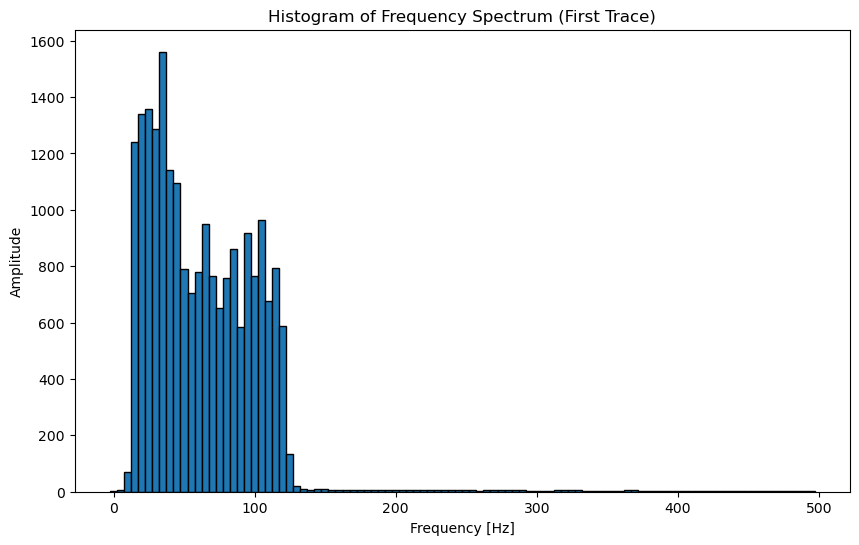

In [26]:
import numpy as np
import segyio
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt


file_path1 = r"C:\Users\RAJKUMAR MONDAL\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\Underground Coal Gasification\seismic data south aus\Leigh_Creek_2016_2018\LCK-16-05_migrated_stack_filtered.sgy"

def read_seismic_data(file_path):
    with segyio.open(file_path, ignore_geometry=True) as segyfile:
        num_traces = segyfile.tracecount
        num_samples = segyfile.samples.size
        seismic_data = np.zeros((num_samples, num_traces))
        for i in range(num_traces):
            seismic_data[:, i] = segyfile.trace[i]
        time = segyfile.samples
        return seismic_data, num_traces, time

seismic_data, num_traces, time = read_seismic_data(file_path1)

# Convert time from milliseconds to seconds
time_in_seconds = time / 1000

dt = time_in_seconds[1] - time_in_seconds[0]  # Sampling interval (time between two samples)
n_samples = len(time_in_seconds)  # Number of time samples

dominant_frequencies = []

for i in range(seismic_data.shape[1]):
    # Perform FFT for the trace
    seismic_trace = seismic_data[:, i]
    fft_result = fft(seismic_trace)

    freqs = fftfreq(n_samples, dt)
    positive_freqs = freqs[:n_samples // 2]
    amplitude_spectrum = np.abs(fft_result[:n_samples // 2])
    
    hist, bin_edges = np.histogram(positive_freqs, bins=100, weights=amplitude_spectrum)
    
    dominant_frequency = bin_edges[np.argmax(hist)]  # Frequency at the peak of the histogram
    dominant_frequencies.append(dominant_frequency)

dominant_frequencies = np.array(dominant_frequencies)

plt.figure(figsize=(10, 6))
seismic_trace = seismic_data[:, 0]
fft_result = fft(seismic_trace)
freqs = fftfreq(n_samples, dt)
positive_freqs = freqs[:n_samples // 2]
amplitude_spectrum = np.abs(fft_result[:n_samples // 2])

hist, bin_edges = np.histogram(positive_freqs, bins=100, weights=amplitude_spectrum)

# Plot the histogram
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('Histogram of Frequency Spectrum (First Trace)')
plt.show()


**Frequency spectrum of whole seismic section to get dominant frequency**

Dominant Frequency of the Entire Seismic Section: 70.96 Hz


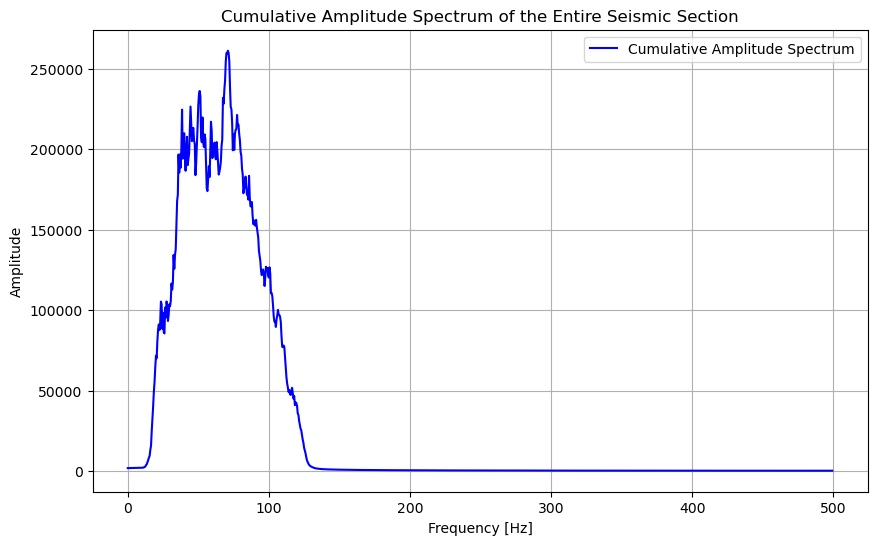

In [27]:
import numpy as np
import segyio
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt


file_path1 = r"C:\Users\RAJKUMAR MONDAL\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\Underground Coal Gasification\seismic data south aus\Leigh_Creek_2016_2018\LCK-16-05_migrated_stack_filtered.sgy"
    
def read_seismic_data(file_path):
    with segyio.open(file_path, ignore_geometry=True) as segyfile:
        num_traces = segyfile.tracecount
        num_samples = segyfile.samples.size
        seismic_data = np.zeros((num_samples, num_traces))
        for i in range(num_traces):
            seismic_data[:, i] = segyfile.trace[i]
        time = segyfile.samples
        return seismic_data, num_traces, time

seismic_data, num_traces, time = read_seismic_data(file_path1)

# Convert time from milliseconds to seconds
time_in_seconds = time / 1000

dt = time_in_seconds[1] - time_in_seconds[0]  # Sampling interval (time between two samples)
n_samples = len(time_in_seconds)  # Number of time samples

cumulative_amplitude_spectrum = np.zeros(n_samples // 2)

for i in range(seismic_data.shape[1]):
    # Perform FFT for the trace
    seismic_trace = seismic_data[:, i]
    fft_result = fft(seismic_trace)

    freqs = fftfreq(n_samples, dt)

    positive_freqs = freqs[:n_samples // 2]
    amplitude_spectrum = np.abs(fft_result[:n_samples // 2])

    cumulative_amplitude_spectrum += amplitude_spectrum

dominant_frequency = positive_freqs[np.argmax(cumulative_amplitude_spectrum)]

print("Dominant Frequency of the Entire Seismic Section: {:.2f} Hz".format(dominant_frequency))

# Optionally, you can visualize the cumulative amplitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, cumulative_amplitude_spectrum, label='Cumulative Amplitude Spectrum', color='b')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('Cumulative Amplitude Spectrum of the Entire Seismic Section')
plt.grid(True)
plt.legend()
plt.show()


**unit convertion from of density from g/cc to kg/m^3**

In [8]:
df5['RHOB']=df5['DENB'] * 1000
df5.columns

Index(['DEPT', 'TENS', 'SPED', 'EAST', 'NORTH', 'TVD', 'CA', 'CD', 'DLS',
       'GRDE', 'CADE', 'TEMP', 'DENL', 'DENB', 'BRDU', 'LSDU', 'SSDU', 'DTPF',
       'VELK', 'LSNU', 'SSNU', 'NPHI', 'AZID', 'TMAG', 'TILD', 'FE1', 'FE2',
       'Vp', 'Vs', 'PR', 'Edyn', 'Esta', 'RHOB'],
      dtype='object')

**Despiking and smoothing**

In [9]:
#Despiking
import pandas as pd
import numpy as np
from scipy.signal import medfilt



# Function for despiking using median filter
def despike(series, window_length=50):
    if window_length % 2 == 0:  # Ensure the window length is odd
        window_length += 1
    return medfilt(series, kernel_size=window_length)

# Apply despiking to Vp and RHOB
df5['Vp_DS'] = despike(df5['Vp'], window_length=10)
df5['RHOB_DS'] = despike(df5['RHOB'], window_length=10)

# Now df5 will contain the despiked columns
df5.head()

,DEPT,TENS,SPED,EAST,NORTH,TVD,CA,CD,DLS,GRDE,...,FE1,FE2,Vp,Vs,PR,Edyn,Esta,RHOB,Vp_DS,RHOB_DS
0,3.2,43.4034,4.03509,0.003457,-0.015685,3.19989,167.571,0.016061,0.00000,42.7413,...,NaN,NaN,1510.571024,359.001217,0.470068,0.640157,0.295753,2227.29,1498.502972,1875.45
1,3.3,42.9834,4.92000,0.003576,-0.015704,3.29987,167.172,0.016106,9.71431,43.9108,...,NaN,NaN,1510.571024,359.001217,0.470068,0.575230,0.265756,2001.39,1501.507419,1875.45
2,3.4,48.4955,4.90000,0.004322,-0.016185,3.39986,165.049,0.016752,37.52690,58.2130,...,NaN,NaN,1509.052832,357.780287,0.470220,0.600748,0.277546,2104.32,1507.537688,1875.45
3,3.5,46.5800,4.92000,0.005005,-0.016569,3.49984,163.191,0.017309,0.00000,61.1747,...,NaN,NaN,1501.507419,351.712266,0.470973,0.636831,0.294216,2307.57,1509.052832,1875.45
4,3.6,48.2194,4.82000,0.005725,-0.016794,3.59983,161.175,0.017743,33.84390,66.7382,...,NaN,NaN,1498.502972,349.296090,0.471272,0.596867,0.275753,2192.49,1510.571024,1875.45


In [10]:
#Smoothing 
# Function for smoothing using moving average
def smooth(series, window_length=10):
    return series.rolling(window=window_length, min_periods=1, center=True).mean()

# Apply smoothing to Vp_DS and RHOB_DS
df5['Vp_DS_SM'] = smooth(df5['Vp_DS'], window_length=10)
df5['RHOB_DS_SM'] = smooth(df5['RHOB_DS'], window_length=10)
df5.head()

,DEPT,TENS,SPED,EAST,NORTH,TVD,CA,CD,DLS,GRDE,...,Vp,Vs,PR,Edyn,Esta,RHOB,Vp_DS,RHOB_DS,Vp_DS_SM,RHOB_DS_SM
0,3.2,43.4034,4.03509,0.003457,-0.015685,3.19989,167.571,0.016061,0.00000,42.7413,...,1510.571024,359.001217,0.470068,0.640157,0.295753,2227.29,1498.502972,1875.45,1505.434387,1875.450000
1,3.3,42.9834,4.92000,0.003576,-0.015704,3.29987,167.172,0.016106,9.71431,43.9108,...,1510.571024,359.001217,0.470068,0.575230,0.265756,2001.39,1501.507419,1875.45,1506.290493,1877.150000
2,3.4,48.4955,4.90000,0.004322,-0.016185,3.39986,165.049,0.016752,37.52690,58.2130,...,1509.052832,357.780287,0.470220,0.600748,0.277546,2104.32,1507.537688,1875.45,1508.875954,1878.364286
3,3.5,46.5800,4.92000,0.005005,-0.016569,3.49984,163.191,0.017309,0.00000,61.1747,...,1501.507419,351.712266,0.470973,0.636831,0.294216,2307.57,1509.052832,1875.45,1512.574152,1879.275000
4,3.6,48.2194,4.82000,0.005725,-0.016794,3.59983,161.175,0.017743,33.84390,66.7382,...,1498.502972,349.296090,0.471272,0.596867,0.275753,2192.49,1510.571024,1875.45,1516.864192,1879.983333


**Two way travel time and depth relation**

In [11]:
import numpy as np

# Define depth increment (in meters)
depth_increment = 0.1  # 10 cm in meters

# Convert DTPF (µs/ft) to interval time (s) for 10 cm depth increments
dt_interval =depth_increment/df5['Vp']  # µs/ft to s/m and then multiply by 0.1 meters

# Cumulative sum of interval times to calculate one-way travel time (OWT)
t_cum = np.cumsum(dt_interval)

# Multiply by 2 to get Two-Way Travel Time (TWT)
df5['TWT'] = t_cum * 2

# Check the maximum Two-Way Travel Time (TWT)
max_twt = df5['TWT'].max()
max_twt




0.5198151347112793

**Calculation of acuastic impedance**

In [12]:
# AI calculate
df5['AI'] = df5['Vp_DS_SM'] * df5['RHOB_DS_SM']        #(unit: kg/m2.s)
df5.head()

,DEPT,TENS,SPED,EAST,NORTH,TVD,CA,CD,DLS,GRDE,...,PR,Edyn,Esta,RHOB,Vp_DS,RHOB_DS,Vp_DS_SM,RHOB_DS_SM,TWT,AI
0,3.2,43.4034,4.03509,0.003457,-0.015685,3.19989,167.571,0.016061,0.00000,42.7413,...,0.470068,0.640157,0.295753,2227.29,1498.502972,1875.45,1505.434387,1875.450000,0.000132,2.823367e+06
1,3.3,42.9834,4.92000,0.003576,-0.015704,3.29987,167.172,0.016106,9.71431,43.9108,...,0.470068,0.575230,0.265756,2001.39,1501.507419,1875.45,1506.290493,1877.150000,0.000265,2.827533e+06
2,3.4,48.4955,4.90000,0.004322,-0.016185,3.39986,165.049,0.016752,37.52690,58.2130,...,0.470220,0.600748,0.277546,2104.32,1507.537688,1875.45,1508.875954,1878.364286,0.000397,2.834219e+06
3,3.5,46.5800,4.92000,0.005005,-0.016569,3.49984,163.191,0.017309,0.00000,61.1747,...,0.470973,0.636831,0.294216,2307.57,1509.052832,1875.45,1512.574152,1879.275000,0.000531,2.842543e+06
4,3.6,48.2194,4.82000,0.005725,-0.016794,3.59983,161.175,0.017743,33.84390,66.7382,...,0.471272,0.596867,0.275753,2192.49,1510.571024,1875.45,1516.864192,1879.983333,0.000664,2.851679e+06


**Calcualtion of reflection coefficient**

In [13]:
Imp = df5['AI'].values
Rc=[]
for i in range(len(Imp)-1):
    Rc.append((Imp[i+1]-Imp[i])/(Imp[i]+Imp[i+1]))

# to adjust vector size copy the last element to the tail
Rc.append(Rc[-1])

df5['Rc'] = pd.Series(Rc, index=df5.index)
df5.head()

,DEPT,TENS,SPED,EAST,NORTH,TVD,CA,CD,DLS,GRDE,...,Edyn,Esta,RHOB,Vp_DS,RHOB_DS,Vp_DS_SM,RHOB_DS_SM,TWT,AI,Rc
0,3.2,43.4034,4.03509,0.003457,-0.015685,3.19989,167.571,0.016061,0.00000,42.7413,...,0.640157,0.295753,2227.29,1498.502972,1875.45,1505.434387,1875.450000,0.000132,2.823367e+06,0.000737
1,3.3,42.9834,4.92000,0.003576,-0.015704,3.29987,167.172,0.016106,9.71431,43.9108,...,0.575230,0.265756,2001.39,1501.507419,1875.45,1506.290493,1877.150000,0.000265,2.827533e+06,0.001181
2,3.4,48.4955,4.90000,0.004322,-0.016185,3.39986,165.049,0.016752,37.52690,58.2130,...,0.600748,0.277546,2104.32,1507.537688,1875.45,1508.875954,1878.364286,0.000397,2.834219e+06,0.001466
3,3.5,46.5800,4.92000,0.005005,-0.016569,3.49984,163.191,0.017309,0.00000,61.1747,...,0.636831,0.294216,2307.57,1509.052832,1875.45,1512.574152,1879.275000,0.000531,2.842543e+06,0.001605
4,3.6,48.2194,4.82000,0.005725,-0.016794,3.59983,161.175,0.017743,33.84390,66.7382,...,0.596867,0.275753,2192.49,1510.571024,1875.45,1516.864192,1879.983333,0.000664,2.851679e+06,0.001275


**Sampling into time domain and recalculation RC**

In [14]:
dt = 0.001   #sampleing interval
t_max = 2.0   # max time to create time vector
t = np.arange(0, t_max, dt)
AI_tdom = np.interp(x=t, xp = df5.TWT, fp = df5.AI)    #resampling
AI_tdom

array([2823366.92092749, 2873672.09832314, 2929478.46240538, ...,
       5853633.63602438, 5853633.63602438, 5853633.63602438])

In [15]:
# again Rc calulation but in reampled time domain
Rc_tdom = []
for i in range(len(AI_tdom)-1):
    Rc_tdom.append((AI_tdom[i+1]-AI_tdom[i])/(AI_tdom[i]+AI_tdom[i+1]))
# to adjust vector size copy the last element to the tail
Rc_tdom.append(Rc_tdom[-1])

**Wavelet generation**

In [16]:
# define function of ricker wavelet
def ricker(f, length, dt):
    t0 = np.arange(-length/2, (length-dt)/2, dt)
    y = (1.0 - 2.0*(np.pi**2)*(f**2)*(t0**2)) * np.exp(-(np.pi**2)*(f**2)*(t0**2))
    return t0, y

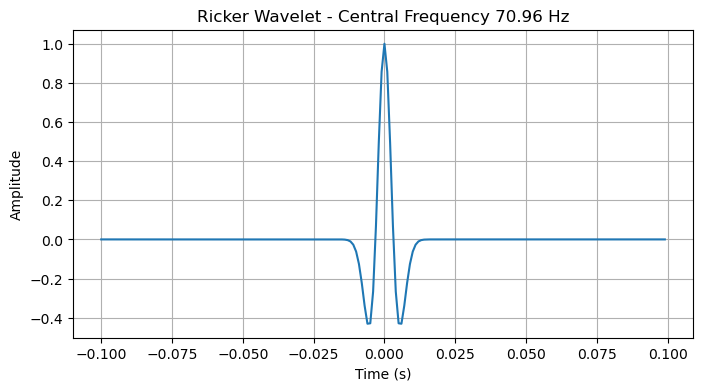

In [17]:
# Parameters
f = 70.96      # Frequency in Hz
length = 0.2  # Total length of wavelet in seconds
dt = 0.001    # Sampling interval in seconds

# Generate the Ricker wavelet
t0, wavelet = ricker(f, length, dt)

# Plot the wavelet
plt.figure(figsize=(8, 4))
plt.plot(t0, wavelet)
plt.title(f'Ricker Wavelet - Central Frequency {f} Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

**Convolution**

In [18]:
synthetic = np.convolve(wavelet, Rc_tdom, mode='same')

**Vizualisation of AI,RC and time depth**

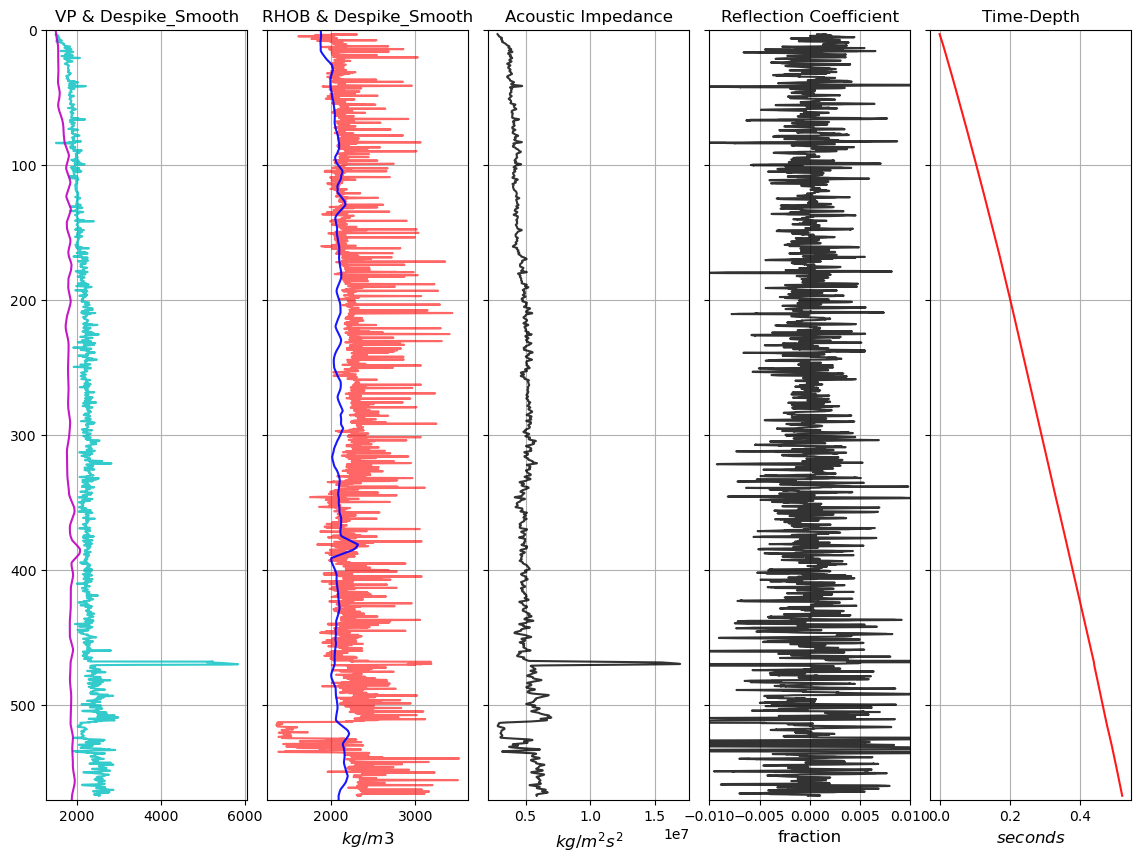

In [19]:
fig, axs = plt.subplots(1, 5, sharey=True, figsize = (14,10))
fig.subplots_adjust(wspace=0.1)

axs[0].plot( df5.Vp, df5.DEPT,'c', alpha=0.8)
axs[0].plot( df5.Vp_DS_SM, df5.index,'m', alpha=0.9)
axs[0].set_title('VP & Despike_Smooth', style = 'normal')
#axs[0].set_xlabel( r'$\mu s/m $', fontsize = '12')
axs[0].set_ylim(0, 570)
axs[0].invert_yaxis()
axs[0].grid()


axs[1].plot( df5.RHOB,df5.DEPT,'r', alpha=0.6)
axs[1].plot( df5.RHOB_DS_SM, df5.index,'b', alpha=0.9)
axs[1].set_title('RHOB & Despike_Smooth', style = 'normal')
axs[1].set_xlabel('$kg/m3$', fontsize = '12')
axs[1].set_ylim(0,570)
axs[1].invert_yaxis()
axs[1].grid()


axs[2].plot( df5.AI, df5.DEPT,'k', alpha=0.8)
axs[2].set_title('Acoustic Impedance', style = 'normal')
axs[2].set_xlabel( r'$kg/m^2s^2$', fontsize = '12')
axs[2].set_ylim(0,570)
axs[2].invert_yaxis()
axs[2].grid()


axs[3].plot( df5.Rc, df5.DEPT,'k', alpha=0.8)
axs[3].set_title('Reflection Coefficient', style = 'normal')
axs[3].set_xlabel('fraction' , fontsize = '12')
axs[3].set_ylim(0,570)
axs[3].set_xlim(-0.01, 0.01)
axs[3].invert_yaxis()
axs[3].grid()


axs[4].plot( df5.TWT, df5.DEPT,'r', alpha=0.9)
axs[4].set_title('Time-Depth', style = 'normal')
axs[4].set_xlabel( '$seconds$', fontsize = '12')
axs[4].set_ylim(0,570)
axs[4].invert_yaxis()
# axs[5].set_yticklabels('')
axs[4].grid()


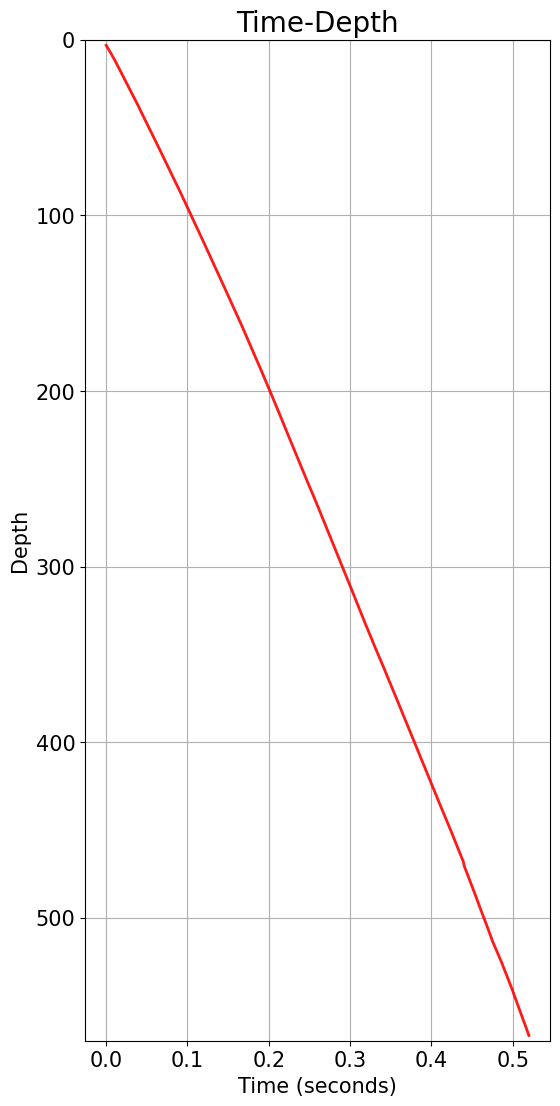

In [20]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(6, 13))

ax.plot(df5['TWT'], df5['DEPT'], 'r', alpha=0.9,linewidth=2)
ax.set_title('Time-Depth', style='normal',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Time (seconds)', fontsize=15)
ax.set_ylabel('Depth', fontsize=15)
ax.set_ylim(570, 0)  # inverts y-axis by setting the larger value first
#ax.set_yticklabels([])  # removes y-tick labels
ax.grid()

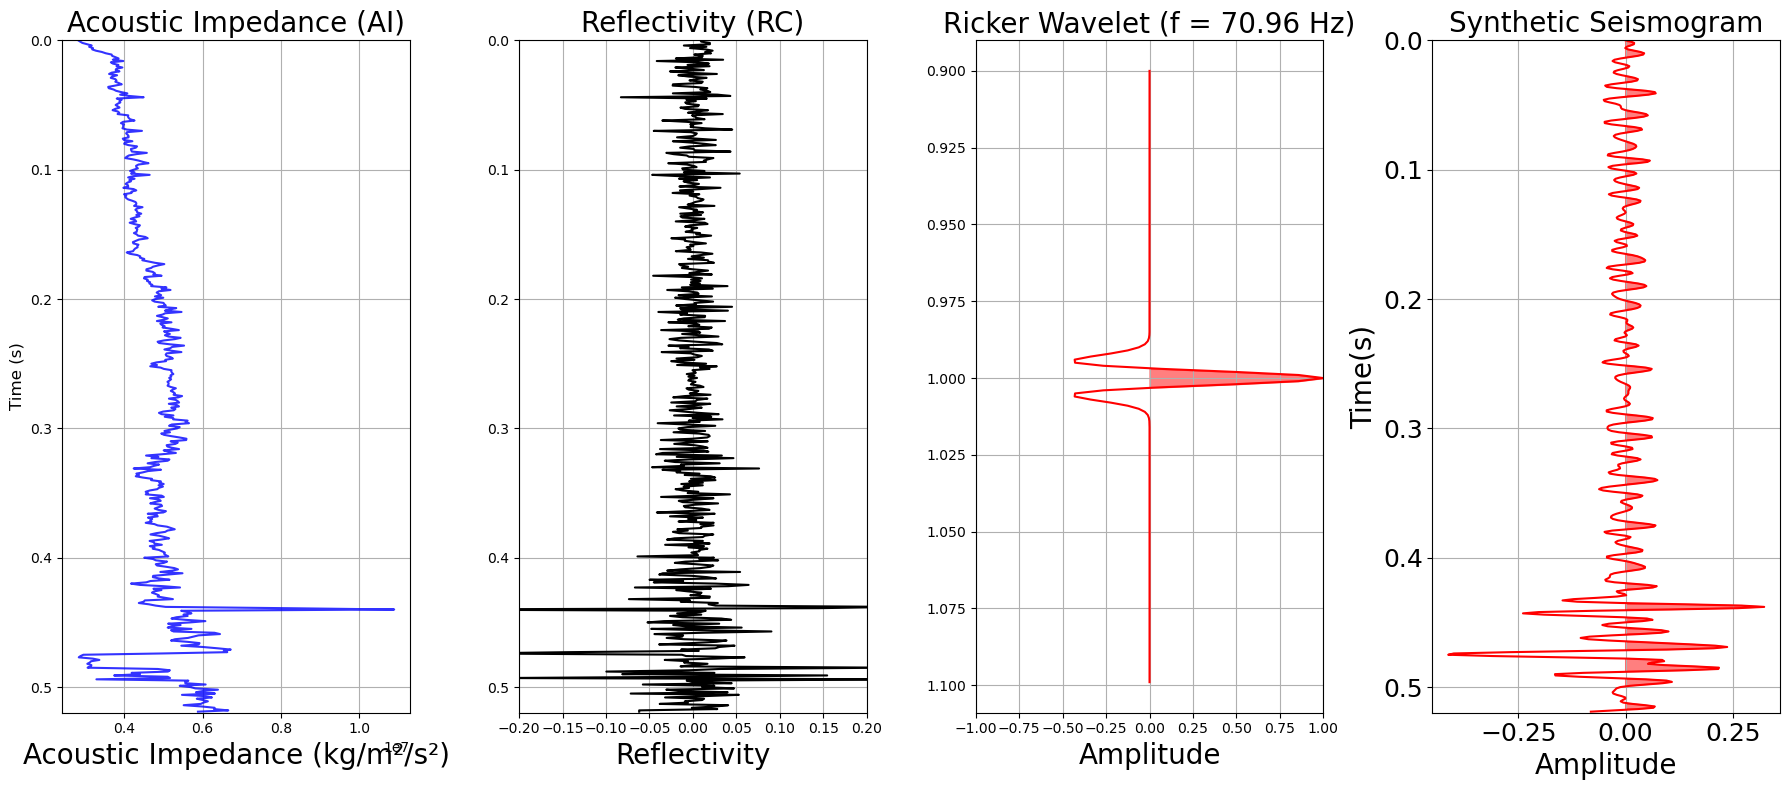

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Plot AI, Reflectivity, Ricker Wavelet, and Synthetic Seismogram
fig, axs = plt.subplots(1, 4, figsize=(18, 8))

# Plot Acoustic Impedance
axs[0].plot(AI_tdom, t, 'b', alpha=0.8)
axs[0].set_title('Acoustic Impedance (AI)', fontsize=20)
axs[0].set_xlabel('Acoustic Impedance (kg/m²/s²)', fontsize=20)
axs[0].set_ylabel('Time (s)', fontsize=12)
axs[0].invert_yaxis()  # Invert y-axis to match seismic convention
axs[0].grid(True)
axs[0].set_ylim([max_twt, 0])  # Limit plot to max TWT

# Plot Reflectivity
axs[1].plot(Rc_tdom, t, 'k')
axs[1].set_title('Reflectivity (RC)', fontsize=20)
axs[1].set_xlabel('Reflectivity', fontsize=20)
axs[1].set_xlim(-0.2, 0.2)  # Limit the reflectivity plot
axs[1].invert_yaxis()
axs[1].grid(True)
axs[1].set_ylim([max_twt, 0])  # Limit plot to max TWT

# Plot Ricker Wavelet
axs[2].plot(wavelet, t0 + 1.0, 'r')  # Adjust t0 to fit the time window
axs[2].fill_betweenx(t0 + 1.0, wavelet, 0, wavelet > 0.0, color='r', alpha=0.5)
axs[2].set_title(f'Ricker Wavelet (f = {f} Hz)', fontsize=20)
axs[2].set_xlabel('Amplitude', fontsize=20)
axs[2].set_xlim(-1, 1)
axs[2].invert_yaxis()
axs[2].grid(True)

# Plot Synthetic Seismogram
axs[3].plot(synthetic, t, 'r')
axs[3].fill_betweenx(t, synthetic, 0, where=synthetic > 0, color='r', alpha=0.5)
axs[3].set_title('Synthetic Seismogram', fontsize=20)
axs[3].tick_params(axis='both', which='major', labelsize=18)
axs[3].set_xlabel('Amplitude', fontsize=20)
axs[3].set_ylabel('Time(s)', fontsize=20)

axs[3].invert_yaxis()
axs[3].grid(True)
axs[3].set_ylim([max_twt, 0])  # Limit plot to max TWT

# Adjust layout and show plot
plt.tight_layout()
#plt.savefig("synthetic.png",dpi=600)
plt.show()


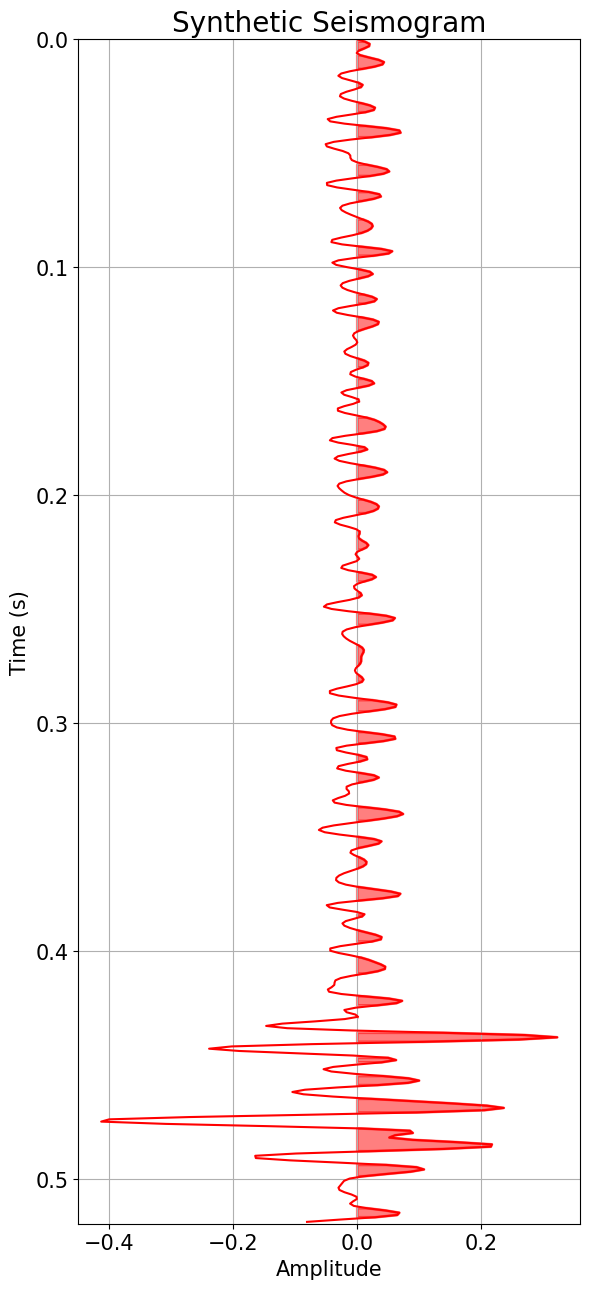

In [22]:
# Plot AI, Reflectivity, Ricker Wavelet, and Synthetic Seismogram
fig, axs = plt.subplots(1, 1, figsize=(6,13))

# Plot Synthetic Seismogram
axs.plot(synthetic, t, 'r')
axs.fill_betweenx(t, synthetic, 0, where=synthetic > 0, color='r', alpha=0.5,linewidth=2)
axs.set_title('Synthetic Seismogram', fontsize=20)
axs.tick_params(axis='both', which='major', labelsize=15)
axs.set_xlabel('Amplitude', fontsize=15)
axs.set_ylabel('Time (s)', fontsize=15)

axs.invert_yaxis()
axs.grid(True)
axs.set_ylim([max_twt, 0])  # Limit plot to max TWT

# Adjust layout and show plot
plt.tight_layout()
plt.show()

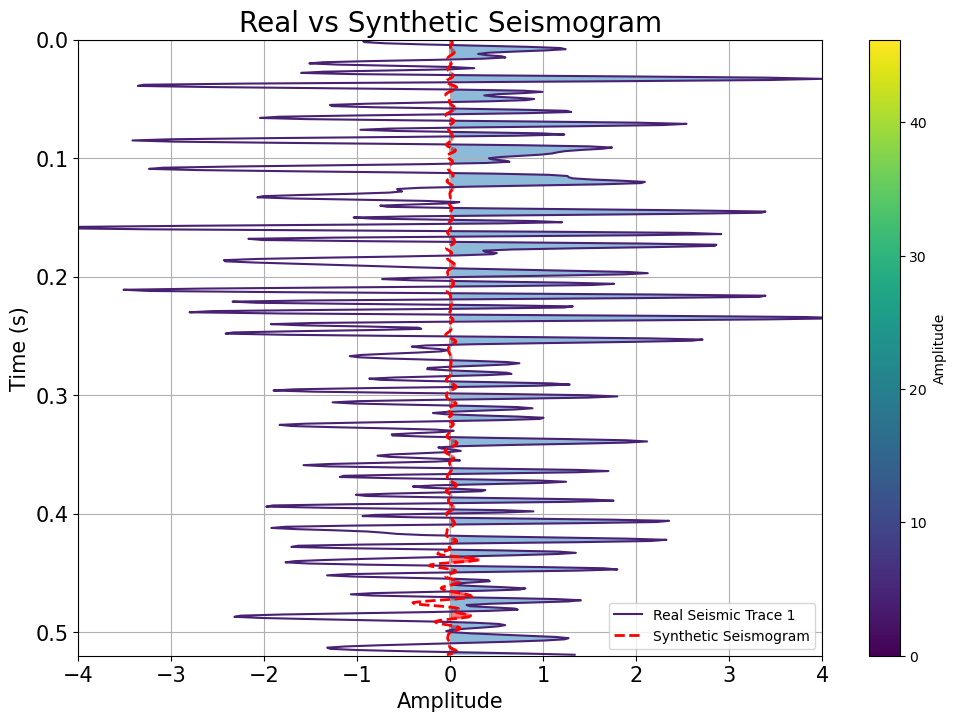

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import segyio
from scipy.interpolate import interp1d

file_path1 = r"C:\Users\RAJKUMAR MONDAL\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\Underground Coal Gasification\seismic data south aus\Leigh_Creek_2016_2018\LCK-16-05_migrated_stack_filtered.sgy"

def read_seismic_data(file_path):
    with segyio.open(file_path, ignore_geometry=True) as segyfile:
        num_traces = segyfile.tracecount
        num_samples = segyfile.samples.size
        seismic_data = np.zeros((num_samples, num_traces))
        for i in range(num_traces):
            seismic_data[:, i] = segyfile.trace[i]
        time = segyfile.samples
        return seismic_data, num_traces, time

seismic_data, num_traces, time = read_seismic_data(file_path1)

# Convert time from milliseconds to seconds
time_in_seconds = time / 1000

max_twt = df5['TWT'].max()  
dt = 0.001 
t = np.arange(0, max_twt, dt)  

AI_tdom = np.interp(t, df5['TWT'], df5['AI'])  # Resample AI for the new time domain

Rc_tdom = []
for i in range(len(AI_tdom) - 1):
    Rc_tdom.append((AI_tdom[i + 1] - AI_tdom[i]) / (AI_tdom[i] + AI_tdom[i + 1]))
Rc_tdom.append(Rc_tdom[-1])  
Rc_tdom = np.array(Rc_tdom)

def ricker(f, length, dt):
    t0 = np.arange(-length / 2, (length - dt) / 2, dt)
    y = (1.0 - 2.0 * (np.pi ** 2) * (f ** 2) * (t0 ** 2)) * np.exp(-(np.pi ** 2) * (f ** 2) * (t0 ** 2))
    return t0, y

f =70.96  # Frequency in Hz
length = 0.2  # Total length of wavelet in seconds
t0, wavelet = ricker(f, length, dt)

synthetic = np.convolve(Rc_tdom, wavelet, mode='same')

real_seismic_resampled = np.zeros((len(t), num_traces))  
for i in range(num_traces):
    interp_real_seismic = interp1d(time_in_seconds, seismic_data[:, i], kind='linear', fill_value="extrapolate")
    real_seismic_resampled[:, i] = interp_real_seismic(t) 

amplitude_max = np.max(np.abs(real_seismic_resampled))
amplitude_min = np.min(np.abs(real_seismic_resampled))

norm = plt.Normalize(vmin=amplitude_min, vmax=amplitude_max)
cmap = plt.cm.viridis

num_selected_traces = 1
trace_indices = np.arange(0, num_selected_traces)  # Select first 20 traces

fig, axs = plt.subplots(1, 1, figsize=(12, 8))

for i in trace_indices:
    color = cmap(norm(np.max(np.abs(real_seismic_resampled[:, i]))))  
    axs.plot(real_seismic_resampled[:, i], t, label=f"Real Seismic Trace {i+1}", color=color)

synthetic_scaled = np.interp(t, np.linspace(0, max_twt, len(synthetic)), synthetic)
axs.plot(synthetic_scaled, t, label="Synthetic Seismogram", color="r", linewidth=2, linestyle='--')

axs.fill_betweenx(t, synthetic_scaled, 0, where=synthetic_scaled > 0, color='r', alpha=0.5, linewidth=2)
for i in trace_indices:
    axs.fill_betweenx(t, real_seismic_resampled[:, i], 0, where=real_seismic_resampled[:, i] > 0, alpha=0.5, linewidth=2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
fig.colorbar(sm, ax=axs, label='Amplitude')
axs.set_title('Real vs Synthetic Seismogram', fontsize=20)
axs.tick_params(axis='both', which='major', labelsize=15)
axs.set_xlabel('Amplitude', fontsize=15)
axs.set_ylabel('Time (s)', fontsize=15)
axs.invert_yaxis()  
axs.grid(True)
axs.set_ylim([max_twt, 0]) 
axs.set_xlim([-4, 4]) 
axs.legend()
plt.show()
